- n = [4000, 8000]

- indp = N
- z_dis = gaussian
- noise_dis = t
- dz=2,3,5,10
- alpha=1.75

In [1]:
import numpy as np
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
from ecit import *


def ecit_simu(n_list=[400,800,2000,4000],
              t=100,
              cit=kcit,
              ensembles=[(p_alpha175,1), (p_alpha175,2), (p_alpha175,400)],
              show_progress=True,
              dz=1,n_indp='N',z_dis='gaussian',noise_dis='gaussian',noise_std=0.3,fun1=None,fun2=None):
    
    results = []

    for p_ensemble, k in ensembles:

        if show_progress: print(f"Ensemble (k={k}, {p_ensemble.__name__})") if k>1 else print(f"Default (k=1)")

        eI = [0]*len(n_list)
        eII = [0]*len(n_list)
        tim = [0]*len(n_list)

        for i, n in enumerate(n_list):

            start_time = time.time()
            iteration_loop = tqdm(range(t), desc=f"n={n}", leave=True, dynamic_ncols=True) if show_progress else range(t)
            for sed in iteration_loop:
                np.random.seed(sed)
                random.seed(sed)
                dataI = np.hstack((generate_samples(n=n,dz=dz,indp='C',z_dis=z_dis, noise_dis=noise_dis,noise_std=noise_std,
                                                    fun1=fun1, fun2=fun1)))
                dataII = np.hstack((generate_samples(n=n,dz=dz,indp=n_indp,z_dis=z_dis, noise_dis=noise_dis,noise_std=noise_std,
                                                     fun1=fun1, fun2=fun1)))
                obj_ECIT = ECIT(dataI, cit, p_ensemble, k if k<100 else int(n/k))
                pI = obj_ECIT([0], [1], list(range(2,dz+2)))
                obj_ECIT = ECIT(dataII, cit, p_ensemble, k if k<100 else int(n/k))
                pII = obj_ECIT([0], [1], list(range(2,dz+2)))
                if pI<0.05:
                    eI[i] += 1
                if pII>0.05:
                    eII[i] += 1

            end_time = time.time()
            tim[i] = end_time - start_time
            eI[i] = eI[i]/t
            eII[i] = eII[i]/t

        results.append([eI, eII, tim])

    return results




def show_results(results, ensembles, n_list):
    dir = {}
    for (p_ensemble, k), result in zip(ensembles, results):
        key_name = f"Ensemble (k={k}, {p_ensemble.__name__})" if k > 1 else f"Default (k=1)"
        dir[key_name] = result

    fig, axes = plt.subplots(2, 2, figsize=(16, 10), dpi=300, sharex=True)
    (ax_eI, ax_eII), (ax_eSum, ax_tim) = axes

    for label, result in dir.items():
        eI, eII, tim = result
        eSum = np.array(eI) + np.array(eII)

        ax_eI.plot(n_list, eI, label=label)
        ax_eII.plot(n_list, eII)
        ax_eSum.plot(n_list, eSum)
        ax_tim.plot(n_list, tim)

    ax_eI.set_title("Error I")
    ax_eI.set_ylabel("Error Rate")

    ax_eII.set_title("Error II")

    ax_eSum.set_title("Error I + Error II")
    ax_eSum.set_xlabel("Sample Size (n)")   
    ax_eSum.set_ylabel("Error Rate")


    ax_tim.set_title("Execution Time")
    ax_tim.set_ylabel("Time (s)")
    ax_tim.set_xlabel("Sample Size (n)")

    fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3, fontsize=12)

    ax_tim.set_xticks(n_list)
    ax_eSum.set_xticks(n_list)

    plt.tight_layout()
    plt.show()

2025-02-05 16:19:51.153289: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-05 16:19:51.155101: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-05 16:19:51.158381: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-05 16:19:51.169521: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738743591.188619    2318 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738743591.19

In [2]:
n_list = [4000, 8000]
ensembles = [(p_alpha175, 1), (p_alpha175, 2000)]
t = 100
cit = ccit

Default (k=1)


n=8000: 100%|██████████| 100/100 [58:37<00:00, 35.18s/it]


Ensemble (k=2000, p_alpha175)


n=8000: 100%|██████████| 100/100 [2:19:43<00:00, 83.84s/it] 


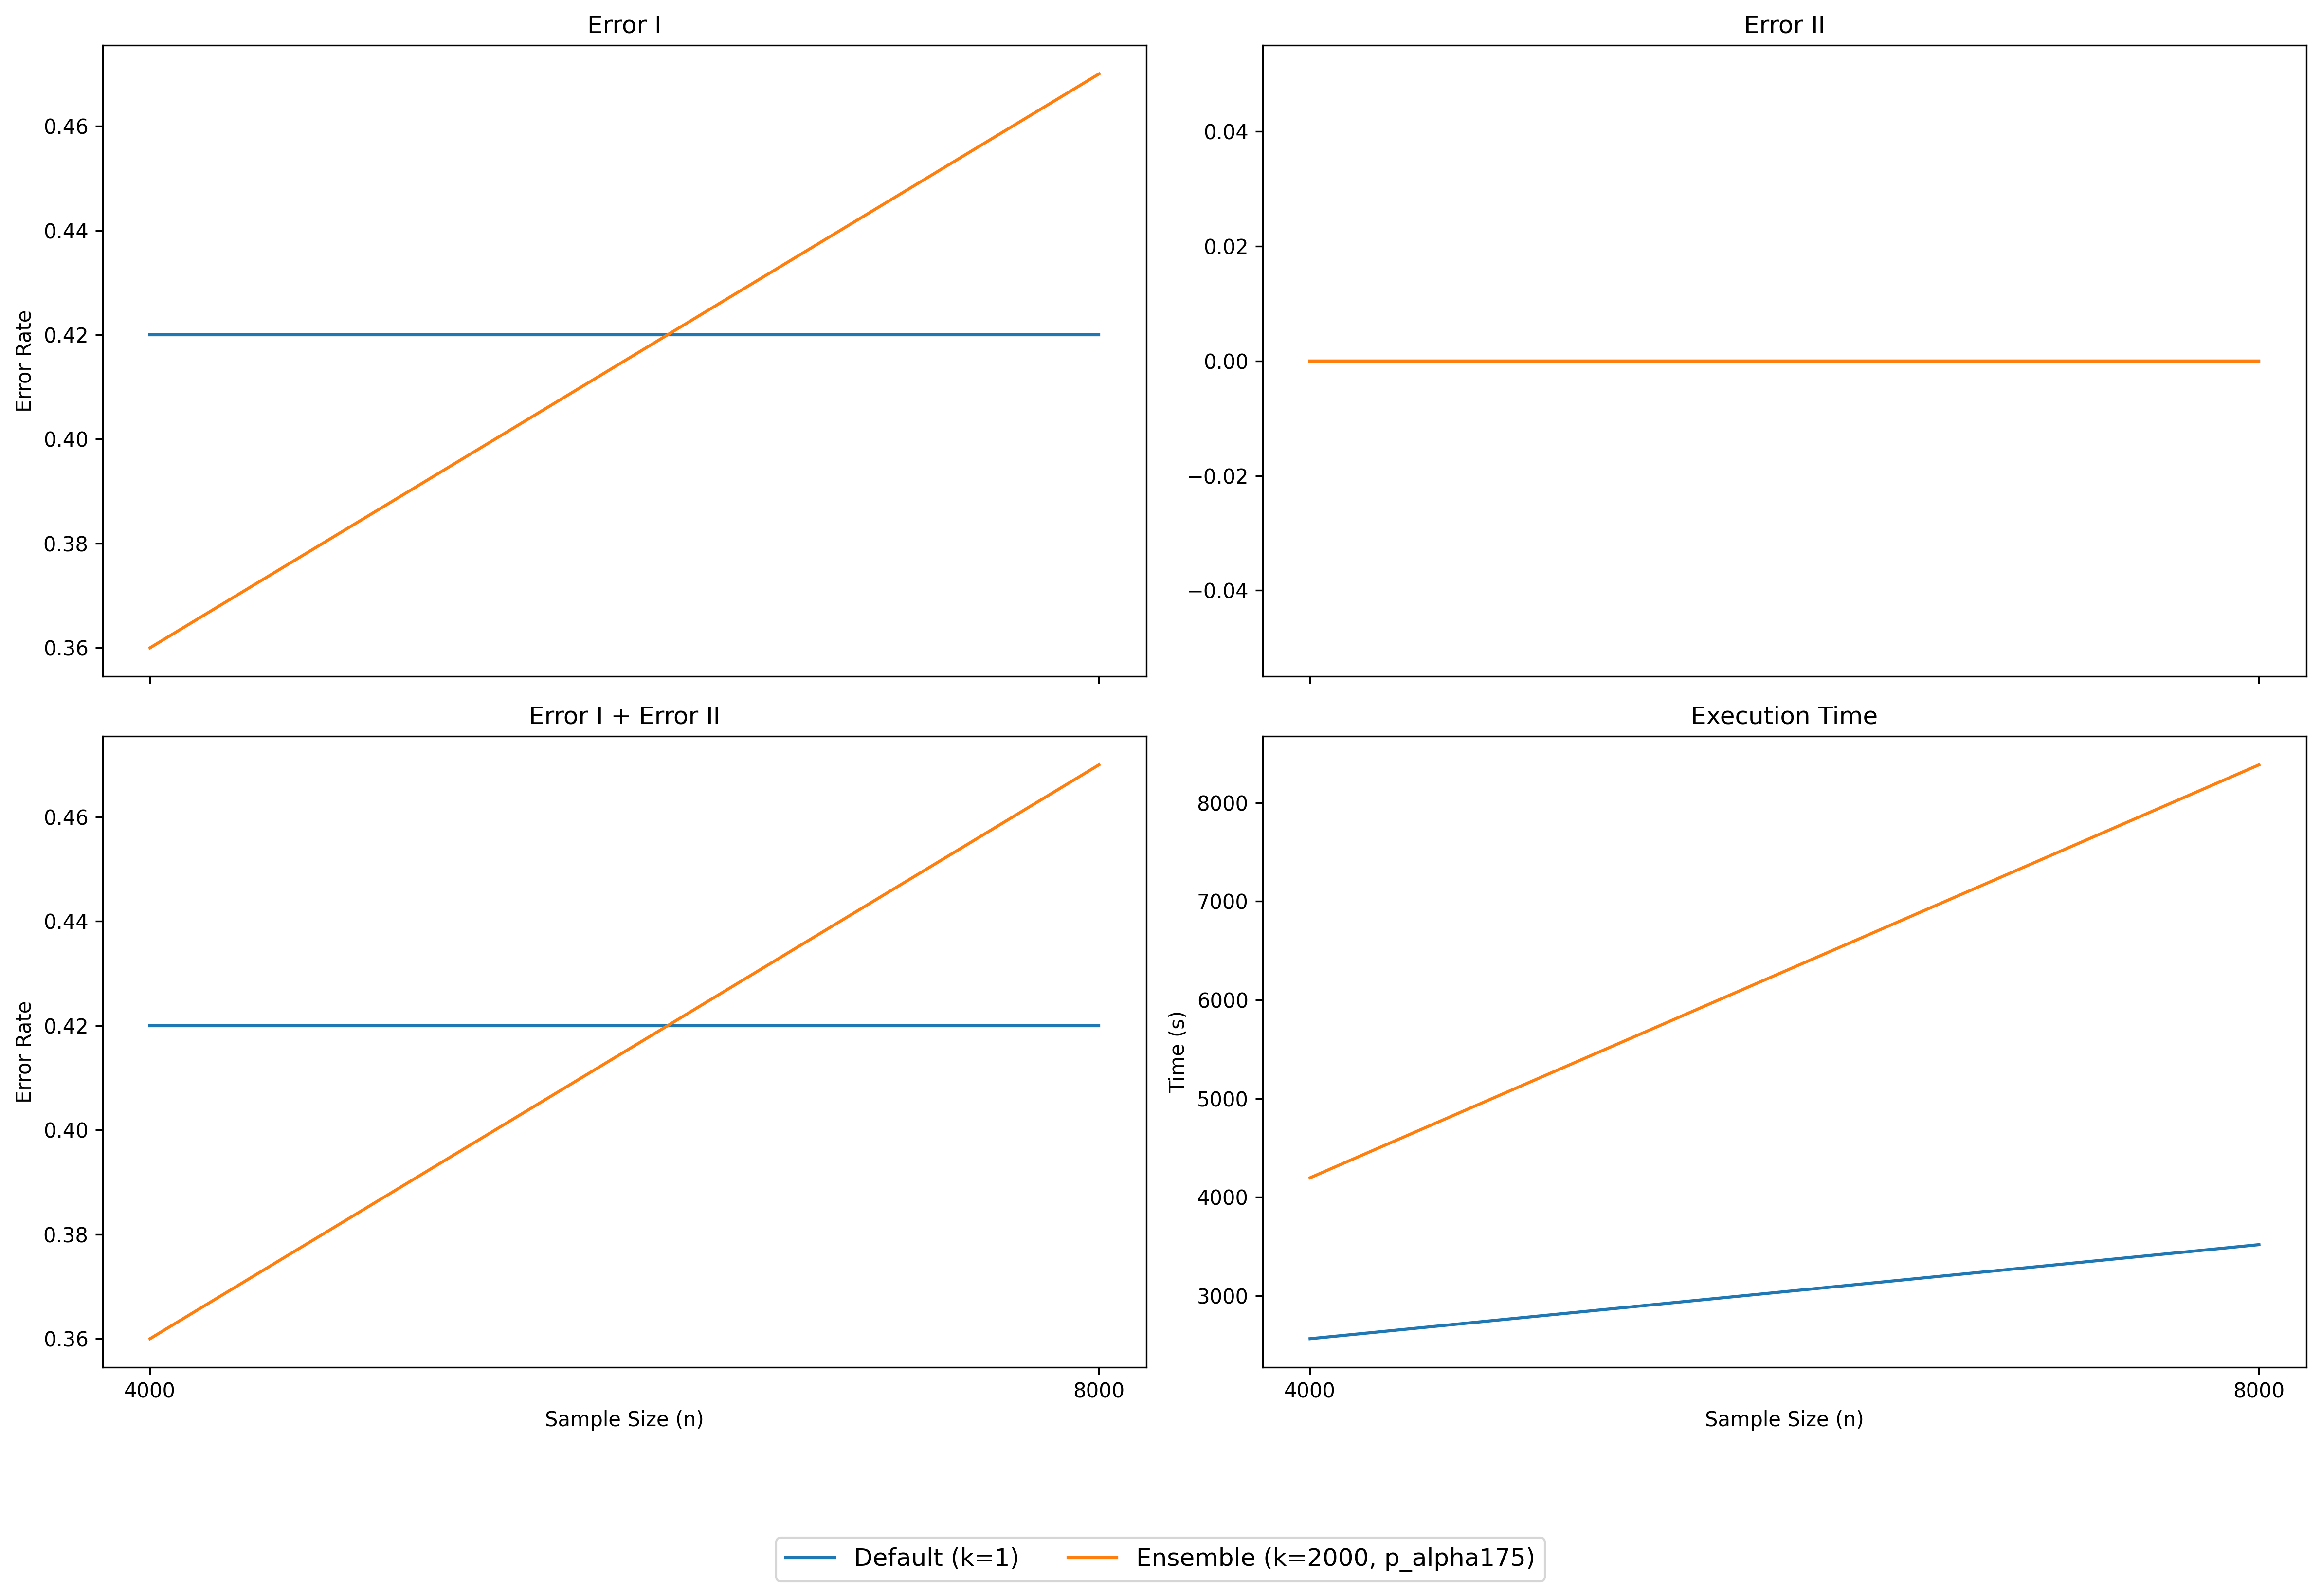

[[[0.42, 0.42], [0.0, 0.0], [2563.7736835479736, 3517.551338195801]],
 [[0.36, 0.47], [0.0, 0.0], [4195.693200588226, 8383.90858244896]]]

In [3]:
results = ecit_simu(n_list=n_list, t=t, cit=cit, ensembles=ensembles,
                    dz=2,z_dis='gaussian',noise_dis='t',noise_std=1,fun1=None,fun2=None)
show_results(results, ensembles, n_list)
results

Default (k=1)


n=8000: 100%|██████████| 100/100 [1:07:04<00:00, 40.25s/it]


Ensemble (k=2000, p_alpha175)


n=8000: 100%|██████████| 100/100 [2:32:46<00:00, 91.66s/it] 


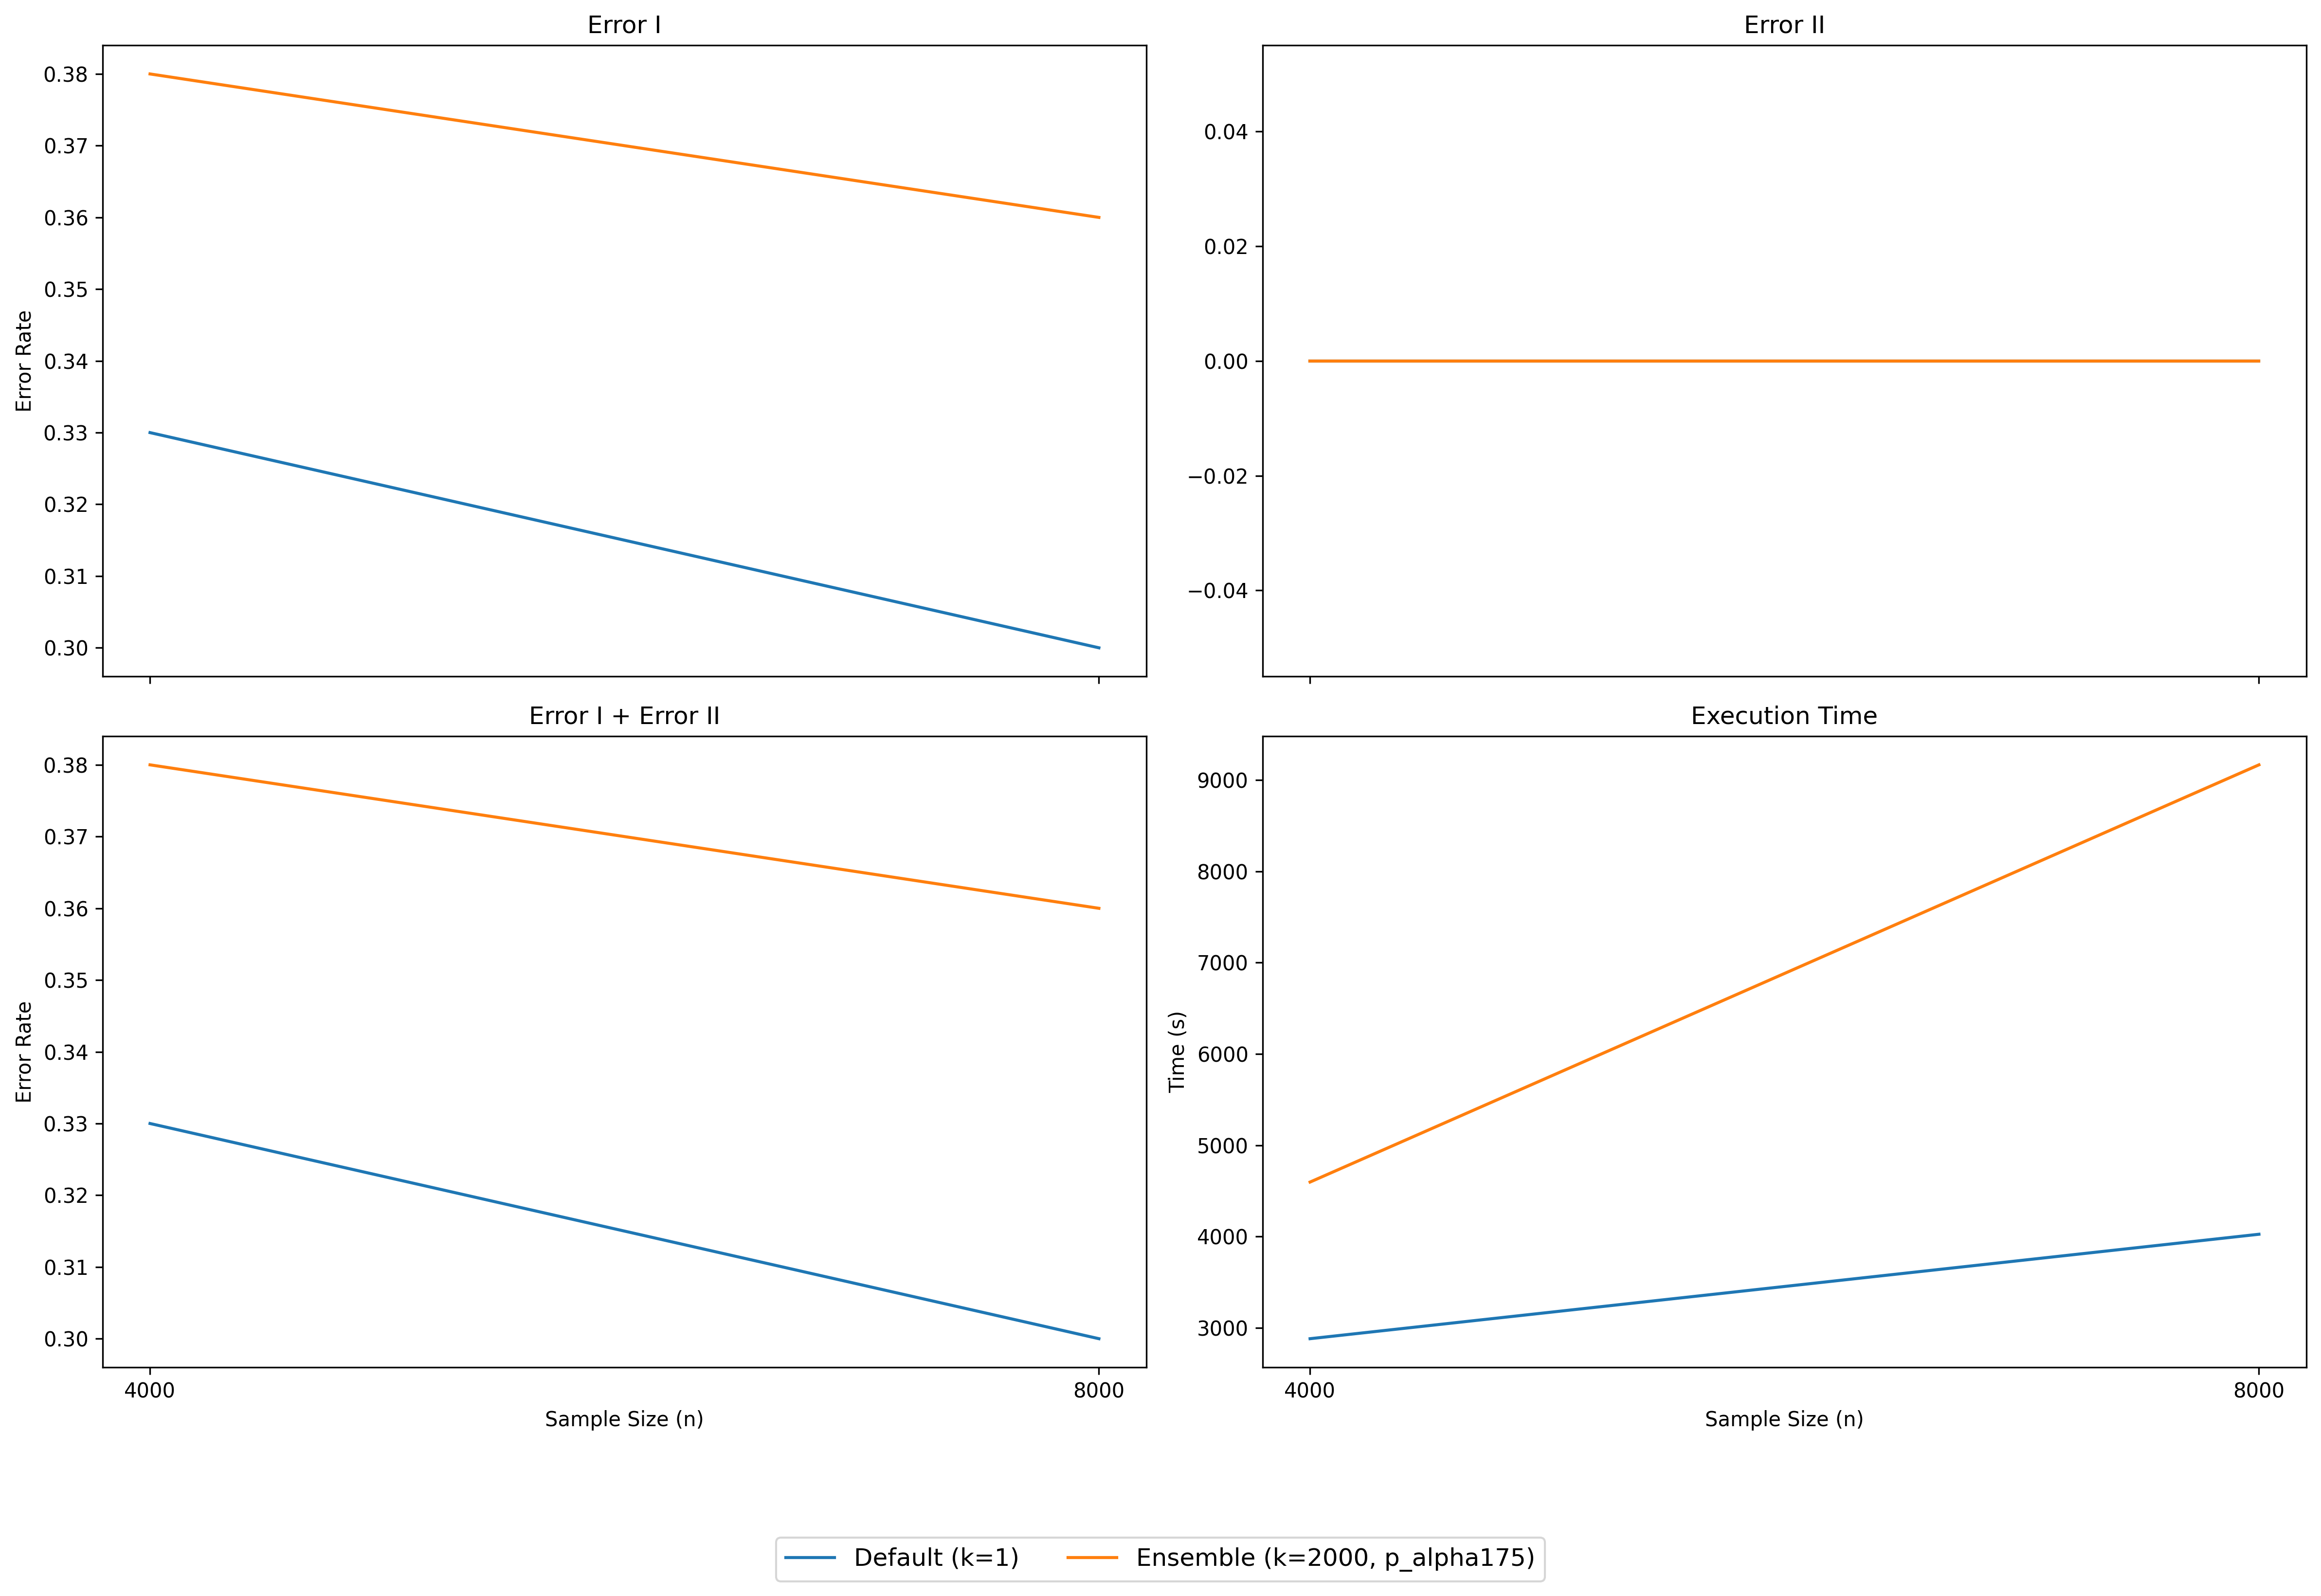

[[[0.33, 0.3], [0.0, 0.0], [2881.0080864429474, 4024.9093730449677]],
 [[0.38, 0.36], [0.0, 0.0], [4596.5557589530945, 9166.129293680191]]]

In [4]:
results = ecit_simu(n_list=n_list, t=t, cit=cit, ensembles=ensembles,
                    dz=3,z_dis='gaussian',noise_dis='t',noise_std=1,fun1=None,fun2=None)
show_results(results, ensembles, n_list)
results

Default (k=1)


n=8000: 100%|██████████| 100/100 [1:26:39<00:00, 52.00s/it]


Ensemble (k=2000, p_alpha175)


n=8000: 100%|██████████| 100/100 [2:58:24<00:00, 107.05s/it] 


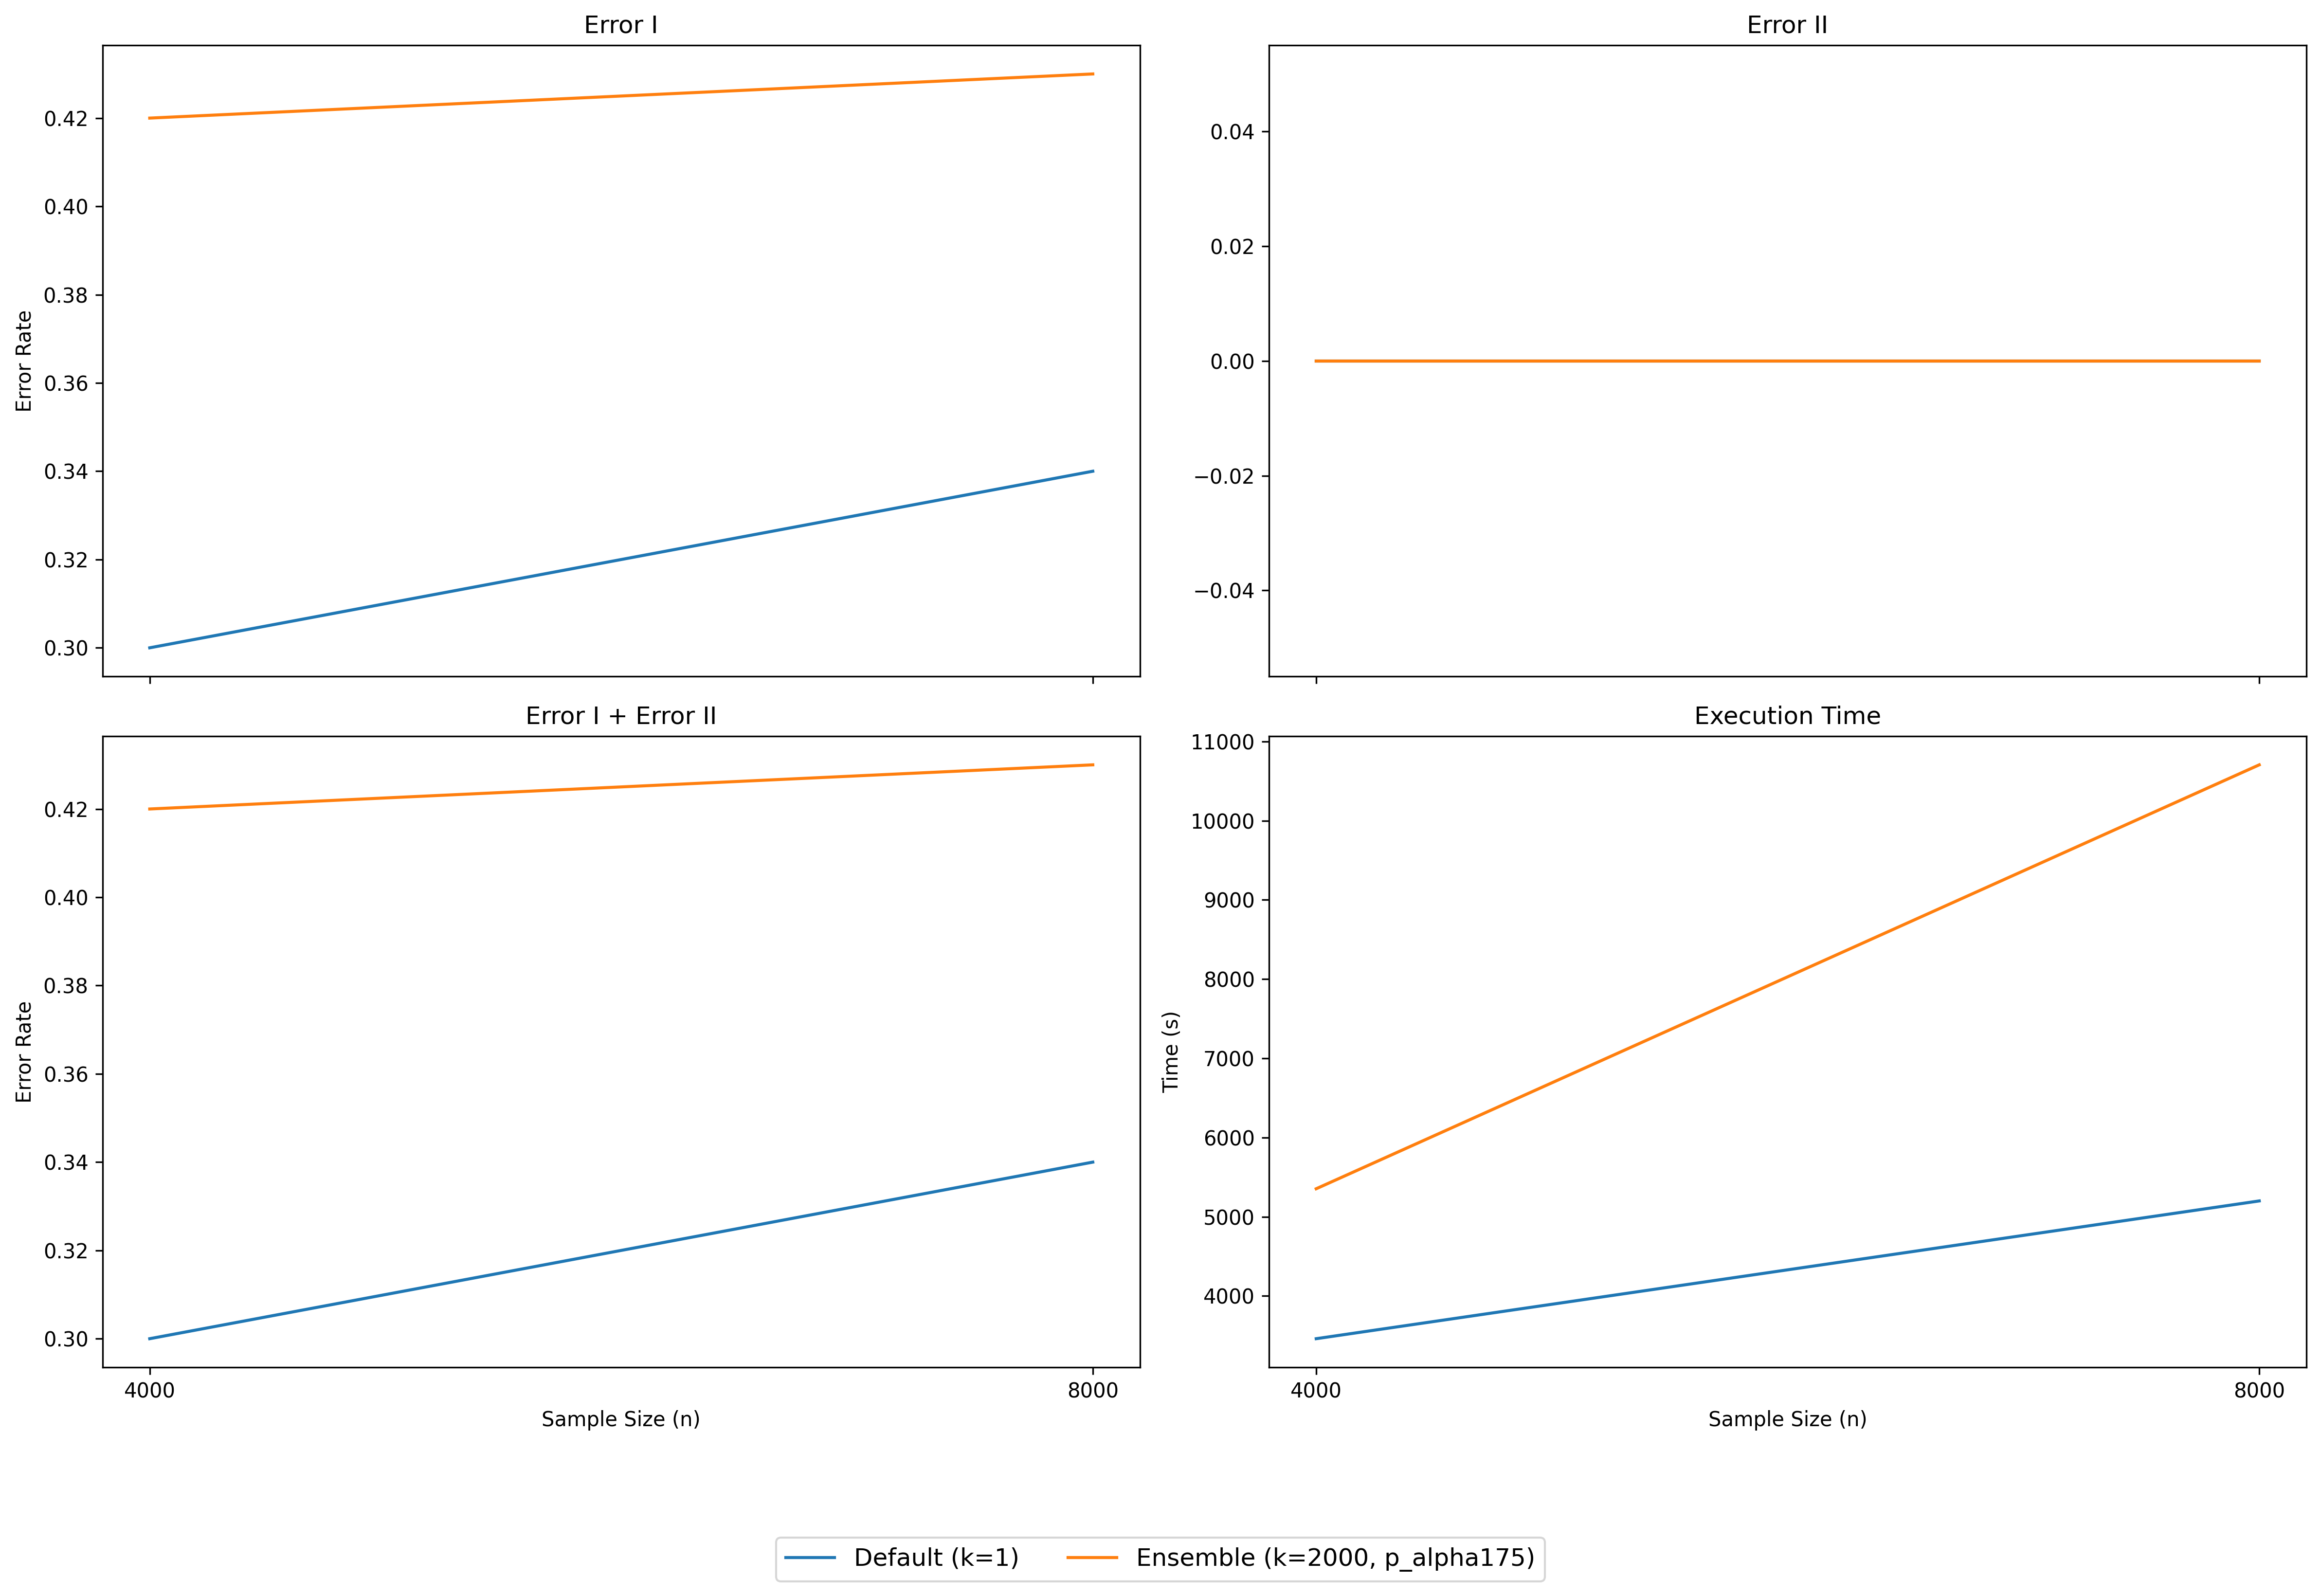

[[[0.3, 0.34], [0.0, 0.0], [3461.0087764263153, 5199.998389482498]],
 [[0.42, 0.43], [0.0, 0.0], [5353.729074478149, 10704.952909708023]]]

In [5]:
results = ecit_simu(n_list=n_list, t=t, cit=cit, ensembles=ensembles,
                    dz=5,z_dis='gaussian',noise_dis='t',noise_std=1,fun1=None,fun2=None)
show_results(results, ensembles, n_list)
results

Default (k=1)


n=8000: 100%|██████████| 100/100 [2:24:39<00:00, 86.80s/it] 


Ensemble (k=2000, p_alpha175)


n=8000: 100%|██████████| 100/100 [4:25:53<00:00, 159.54s/it] 


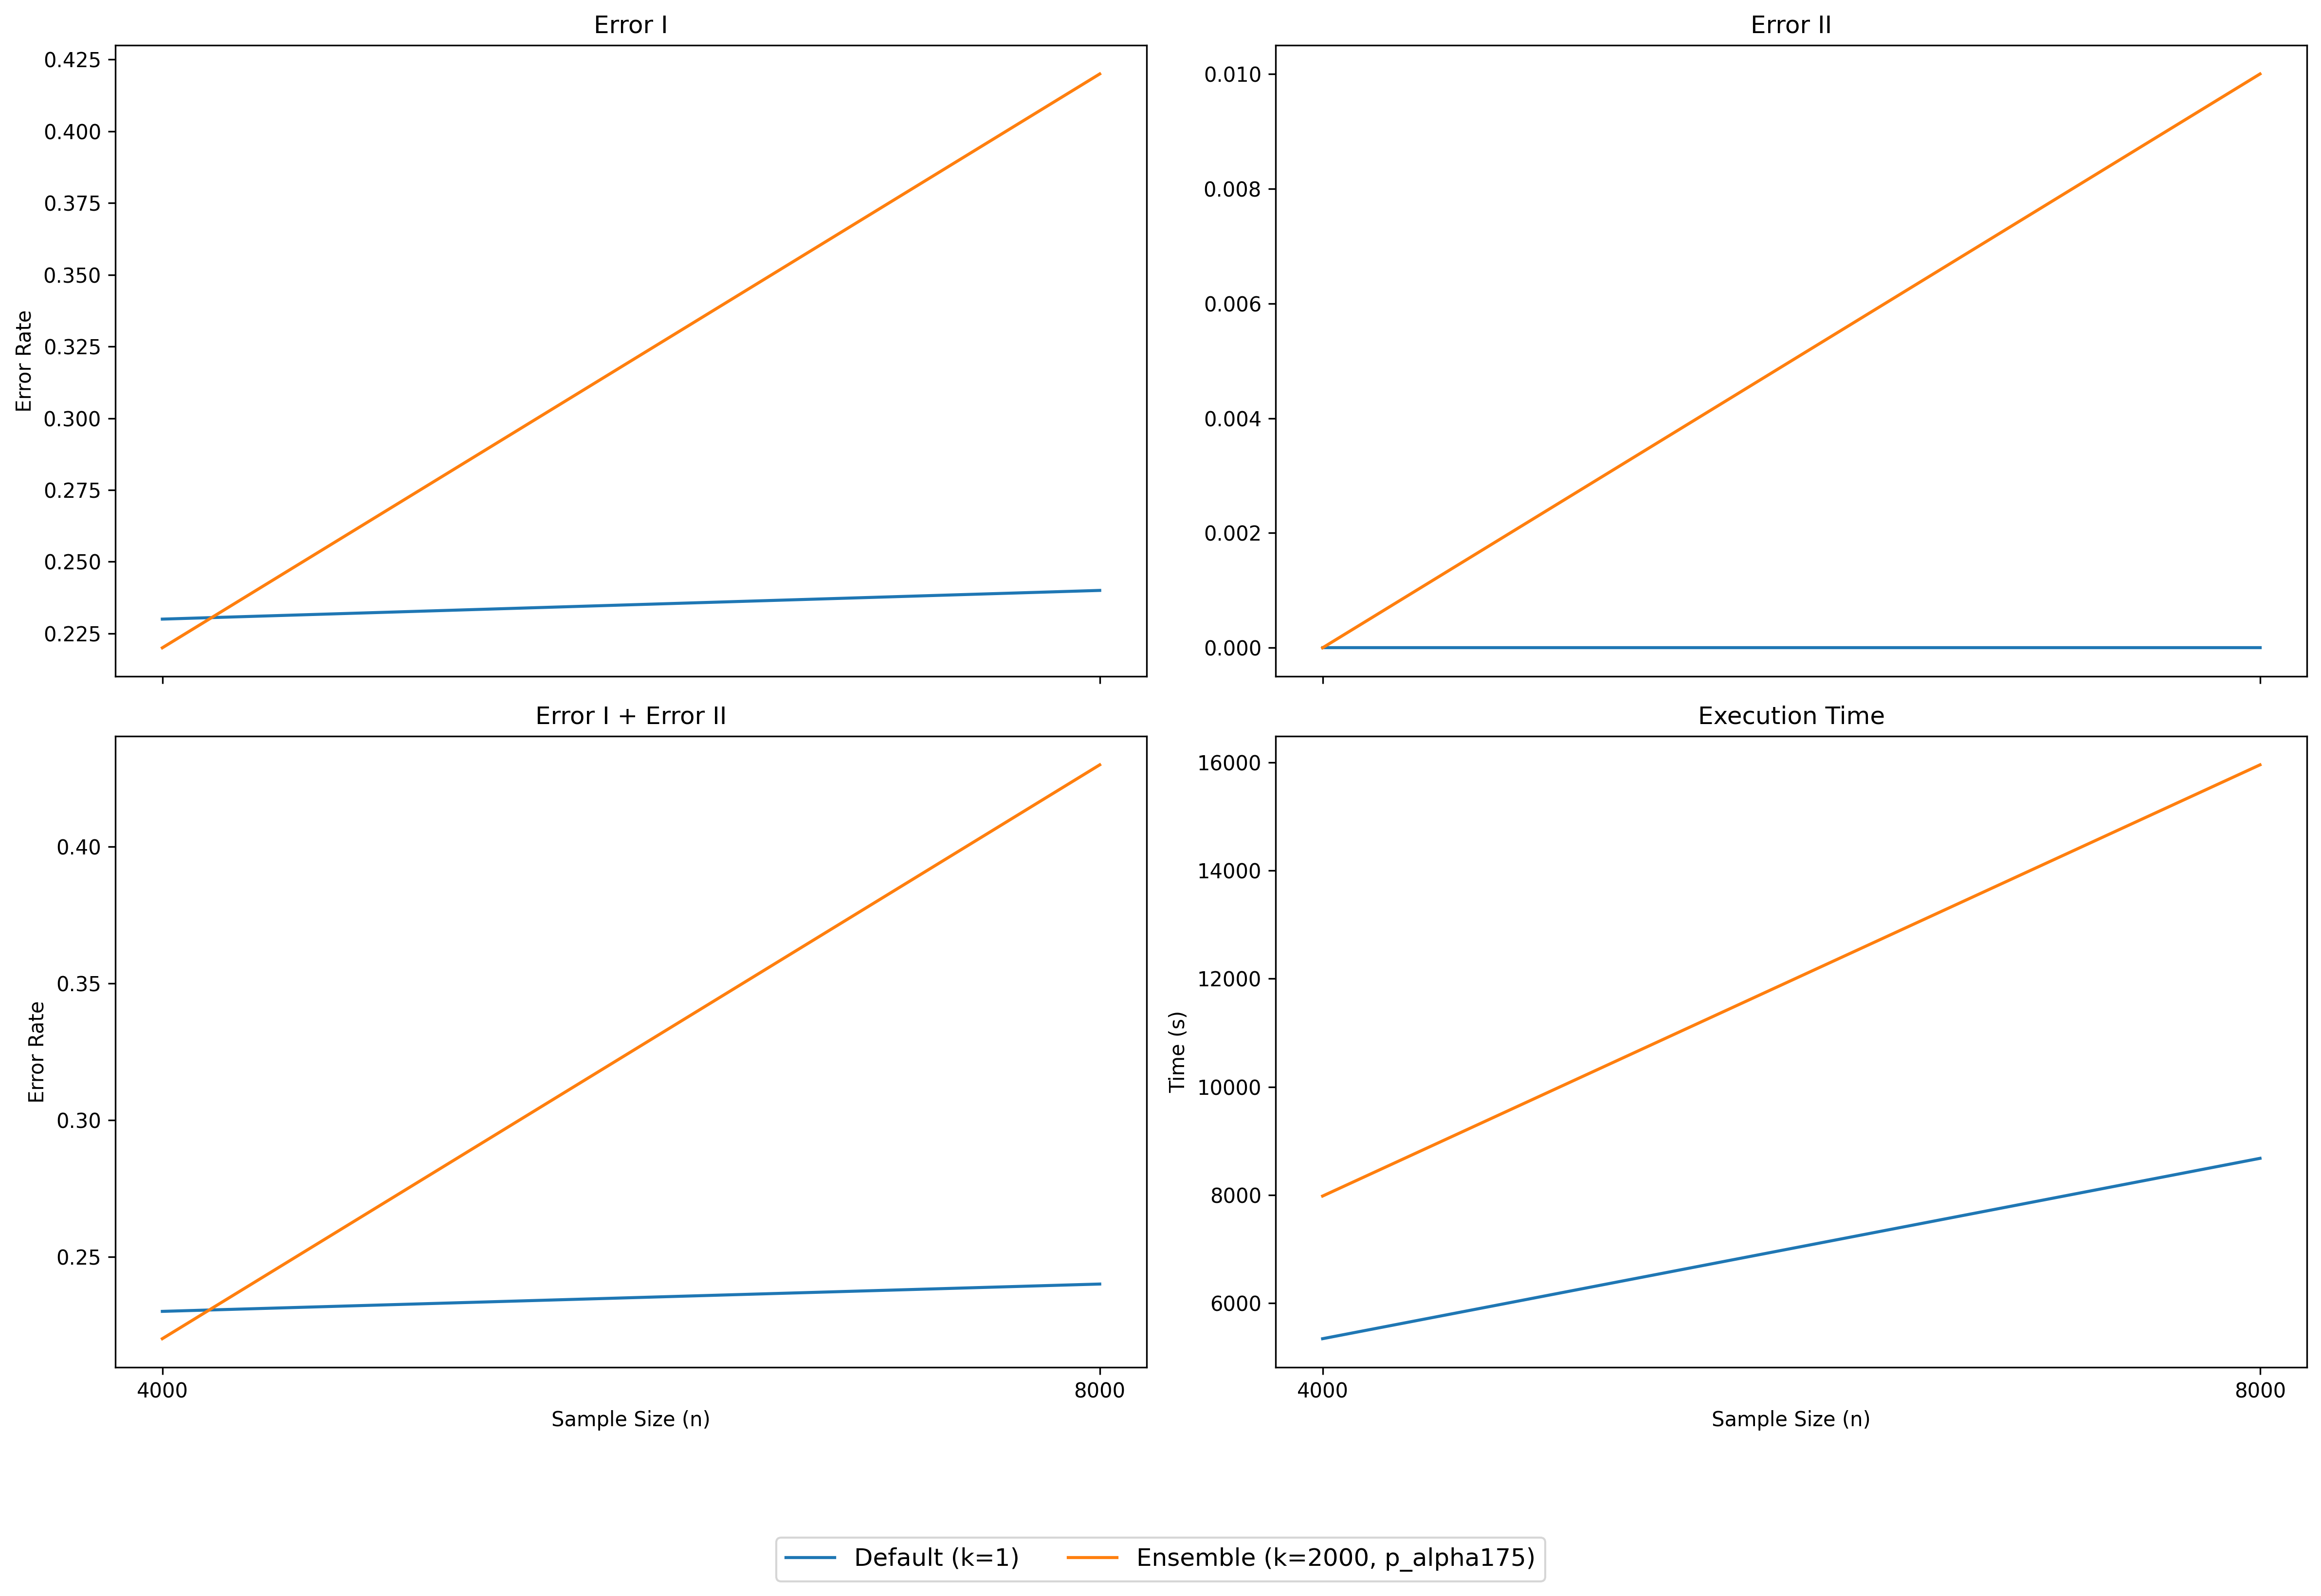

[[[0.23, 0.24], [0.0, 0.0], [5345.655210733414, 8679.739901542664]],
 [[0.22, 0.42], [0.0, 0.01], [7982.39115357399, 15953.570399999619]]]

In [6]:
results = ecit_simu(n_list=n_list, t=t, cit=cit, ensembles=ensembles,
                    dz=10,z_dis='gaussian',noise_dis='t',noise_std=1,fun1=None,fun2=None)
show_results(results, ensembles, n_list)
results